<a href="https://www.kaggle.com/code/sohaelshafey/palestine-israel-news-conflict?scriptVersionId=157891379" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/israel-hamas-conflict-news-dataset/news_data.csv


# Load Data

In [2]:
news_df=pd.read_csv('/kaggle/input/israel-hamas-conflict-news-dataset/news_data.csv')
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338 entries, 0 to 3337
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headline     3338 non-null   object
 1   description  3338 non-null   object
 2   date         3338 non-null   object
dtypes: object(3)
memory usage: 78.4+ KB


In [3]:
#extract year of publishing from data
news_df["year"] = pd.to_datetime(news_df["date"]).dt.year
news_df["year"].value_counts()

/tmp/ipykernel_19/3855977536.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  news_df["year"] = pd.to_datetime(news_df["date"]).dt.year


year
2023    2406
2022     481
2021     449
2017       1
2014       1
Name: count, dtype: int64

# Preprecessing

In [4]:
#lowering case
news_df['headline'] = news_df['headline'].apply(lambda x:x.lower())
news_df['description'] = news_df['description'].apply(lambda x:x.lower())
news_df.head(10)

,headline,description,date,year
0,gaza’s jour­nal­ists: ‘tar­gets’ or ‘ca­su­al­...,gaza’s jour­nal­ists are be­ing killed at an u...,23-12-2023,2023
1,is­rael or­ders ‘death cor­ri­dor’ evac­u­a­ti...,hun­dreds of pales­tini­ans were forced to eva...,23-12-2023,2023
2,"is­rael’s war on gaza: list of key events, day 78",un se­cu­ri­ty coun­cil pass­es res­o­lu­tion ...,23-12-2023,2023
3,us ac­cus­es iran of be­ing ‘deeply in­volved’...,white house says tehran is pro­vid­ing yemeni ...,23-12-2023,2023
4,is­raeli forces con­tin­ue at­tacks amid crit­...,the wa­tered-down res­o­lu­tion boost­ing aid ...,23-12-2023,2023
5,rsf files sec­ond war crimes com­plaint with i...,lat­est com­plaint by paris-based press free­d...,22-12-2023,2023
6,un se­cu­ri­ty coun­cil pass­es res­o­lu­tion ...,the us ab­stains on res­o­lu­tion that it lob­...,22-12-2023,2023
7,watch­ing the watch­dogs: why the west mis­in­...,west­ern me­dia are un­able to as­sess ac­cu­r...,22-12-2023,2023
8,mar­i­anne williamson on her us pres­i­den­tia...,‘the death of a pales­tin­ian child is no less...,22-12-2023,2023
9,is­rael’s ai-pow­ered ‘mass as­sas­si­na­tion ...,‘ac­count­abil­i­ty can’t be trans­ferred to a...,22-12-2023,2023


In [5]:
#Tokenization
from nltk.tokenize import word_tokenize
news_df['headline'] = news_df['headline'].apply(lambda x:word_tokenize(x))
news_df['description'] = news_df['description'].apply(lambda x:word_tokenize(x))
news_df.head(10)

,headline,description,date,year
0,"[gaza, ’, s, jour­nal­ists, :, ‘, tar­gets, ’,...","[gaza, ’, s, jour­nal­ists, are, be­ing, kille...",23-12-2023,2023
1,"[is­rael, or­ders, ‘, death, cor­ri­dor, ’, ev...","[hun­dreds, of, pales­tini­ans, were, forced, ...",23-12-2023,2023
2,"[is­rael, ’, s, war, on, gaza, :, list, of, ke...","[un, se­cu­ri­ty, coun­cil, pass­es, res­o­lu­...",23-12-2023,2023
3,"[us, ac­cus­es, iran, of, be­ing, ‘, deeply, i...","[white, house, says, tehran, is, pro­vid­ing, ...",23-12-2023,2023
4,"[is­raeli, forces, con­tin­ue, at­tacks, amid,...","[the, wa­tered-down, res­o­lu­tion, boost­ing,...",23-12-2023,2023
5,"[rsf, files, sec­ond, war, crimes, com­plaint,...","[lat­est, com­plaint, by, paris-based, press, ...",22-12-2023,2023
6,"[un, se­cu­ri­ty, coun­cil, pass­es, res­o­lu­...","[the, us, ab­stains, on, res­o­lu­tion, that, ...",22-12-2023,2023
7,"[watch­ing, the, watch­dogs, :, why, the, west...","[west­ern, me­dia, are, un­able, to, as­sess, ...",22-12-2023,2023
8,"[mar­i­anne, williamson, on, her, us, pres­i­d...","[‘, the, death, of, a, pales­tin­ian, child, i...",22-12-2023,2023
9,"[is­rael, ’, s, ai-pow­ered, ‘, mass, as­sas­s...","[‘, ac­count­abil­i­ty, can, ’, t, be, trans­f...",22-12-2023,2023


In [6]:
#removing punctuation
import string
news_df['headline'] = news_df['headline'].apply(lambda x:[wrd for wrd in x if wrd not in string.punctuation])
news_df['description'] = news_df['description'].apply(lambda x:[wrd for wrd in x if wrd not in string.punctuation])
news_df.head(10)

,headline,description,date,year
0,"[gaza, ’, s, jour­nal­ists, ‘, tar­gets, ’, or...","[gaza, ’, s, jour­nal­ists, are, be­ing, kille...",23-12-2023,2023
1,"[is­rael, or­ders, ‘, death, cor­ri­dor, ’, ev...","[hun­dreds, of, pales­tini­ans, were, forced, ...",23-12-2023,2023
2,"[is­rael, ’, s, war, on, gaza, list, of, key, ...","[un, se­cu­ri­ty, coun­cil, pass­es, res­o­lu­...",23-12-2023,2023
3,"[us, ac­cus­es, iran, of, be­ing, ‘, deeply, i...","[white, house, says, tehran, is, pro­vid­ing, ...",23-12-2023,2023
4,"[is­raeli, forces, con­tin­ue, at­tacks, amid,...","[the, wa­tered-down, res­o­lu­tion, boost­ing,...",23-12-2023,2023
5,"[rsf, files, sec­ond, war, crimes, com­plaint,...","[lat­est, com­plaint, by, paris-based, press, ...",22-12-2023,2023
6,"[un, se­cu­ri­ty, coun­cil, pass­es, res­o­lu­...","[the, us, ab­stains, on, res­o­lu­tion, that, ...",22-12-2023,2023
7,"[watch­ing, the, watch­dogs, why, the, west, m...","[west­ern, me­dia, are, un­able, to, as­sess, ...",22-12-2023,2023
8,"[mar­i­anne, williamson, on, her, us, pres­i­d...","[‘, the, death, of, a, pales­tin­ian, child, i...",22-12-2023,2023
9,"[is­rael, ’, s, ai-pow­ered, ‘, mass, as­sas­s...","[‘, ac­count­abil­i­ty, can, ’, t, be, trans­f...",22-12-2023,2023


In [7]:
#remove small words
news_df['headline'] = news_df['headline'].apply(lambda x:[word for word in x if len(word)>=2])
news_df['description'] = news_df['description'].apply(lambda x:[word for word in x if len(word)>=2])
news_df.head(10)

,headline,description,date,year
0,"[gaza, jour­nal­ists, tar­gets, or, ca­su­al­t...","[gaza, jour­nal­ists, are, be­ing, killed, at,...",23-12-2023,2023
1,"[is­rael, or­ders, death, cor­ri­dor, evac­u­a...","[hun­dreds, of, pales­tini­ans, were, forced, ...",23-12-2023,2023
2,"[is­rael, war, on, gaza, list, of, key, events...","[un, se­cu­ri­ty, coun­cil, pass­es, res­o­lu­...",23-12-2023,2023
3,"[us, ac­cus­es, iran, of, be­ing, deeply, in­v...","[white, house, says, tehran, is, pro­vid­ing, ...",23-12-2023,2023
4,"[is­raeli, forces, con­tin­ue, at­tacks, amid,...","[the, wa­tered-down, res­o­lu­tion, boost­ing,...",23-12-2023,2023
5,"[rsf, files, sec­ond, war, crimes, com­plaint,...","[lat­est, com­plaint, by, paris-based, press, ...",22-12-2023,2023
6,"[un, se­cu­ri­ty, coun­cil, pass­es, res­o­lu­...","[the, us, ab­stains, on, res­o­lu­tion, that, ...",22-12-2023,2023
7,"[watch­ing, the, watch­dogs, why, the, west, m...","[west­ern, me­dia, are, un­able, to, as­sess, ...",22-12-2023,2023
8,"[mar­i­anne, williamson, on, her, us, pres­i­d...","[the, death, of, pales­tin­ian, child, is, no,...",22-12-2023,2023
9,"[is­rael, ai-pow­ered, mass, as­sas­si­na­tion...","[ac­count­abil­i­ty, can, be, trans­ferred, to...",22-12-2023,2023


In [8]:
#remove punctuation inside words
import re
news_df['headline'] = news_df['headline'].apply(lambda x:[re.sub(r'[^\w\s]', '', wrd) for wrd in x])
news_df['description'] = news_df['description'].apply(lambda x:[re.sub(r'[^\w\s]', '', wrd) for wrd in x])
news_df.head(10)

,headline,description,date,year
0,"[gaza, journalists, targets, or, casualties, o...","[gaza, journalists, are, being, killed, at, an...",23-12-2023,2023
1,"[israel, orders, death, corridor, evacuation, ...","[hundreds, of, palestinians, were, forced, to,...",23-12-2023,2023
2,"[israel, war, on, gaza, list, of, key, events,...","[un, security, council, passes, resolution, to...",23-12-2023,2023
3,"[us, accuses, iran, of, being, deeply, involve...","[white, house, says, tehran, is, providing, ye...",23-12-2023,2023
4,"[israeli, forces, continue, attacks, amid, cri...","[the, watereddown, resolution, boosting, aid, ...",23-12-2023,2023
5,"[rsf, files, second, war, crimes, complaint, w...","[latest, complaint, by, parisbased, press, fre...",22-12-2023,2023
6,"[un, security, council, passes, resolution, on...","[the, us, abstains, on, resolution, that, it, ...",22-12-2023,2023
7,"[watching, the, watchdogs, why, the, west, mis...","[western, media, are, unable, to, assess, accu...",22-12-2023,2023
8,"[marianne, williamson, on, her, us, presidenti...","[the, death, of, palestinian, child, is, no, l...",22-12-2023,2023
9,"[israel, aipowered, mass, assassination, factory]","[accountability, can, be, transferred, to, any...",22-12-2023,2023


In [9]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

news_df['headline'] = news_df['headline'].apply(lambda x:[word for word in x if word not in stop_words])
news_df['description'] = news_df['description'].apply(lambda x:[word for word in x if word not in stop_words])
news_df.head(10)

,headline,description,date,year
0,"[gaza, journalists, targets, casualties, israe...","[gaza, journalists, killed, unprecedented, rat...",23-12-2023,2023
1,"[israel, orders, death, corridor, evacuation, ...","[hundreds, palestinians, forced, evacuate, bur...",23-12-2023,2023
2,"[israel, war, gaza, list, key, events, day, 78]","[un, security, council, passes, resolution, bo...",23-12-2023,2023
3,"[us, accuses, iran, deeply, involved, houthi, ...","[white, house, says, tehran, providing, yemeni...",23-12-2023,2023
4,"[israeli, forces, continue, attacks, amid, cri...","[watereddown, resolution, boosting, aid, gaza,...",23-12-2023,2023
5,"[rsf, files, second, war, crimes, complaint, i...","[latest, complaint, parisbased, press, freedom...",22-12-2023,2023
6,"[un, security, council, passes, resolution, in...","[us, abstains, resolution, lobbied, weaken, co...",22-12-2023,2023
7,"[watching, watchdogs, west, misinterprets, mid...","[western, media, unable, assess, accurately, g...",22-12-2023,2023
8,"[marianne, williamson, us, presidential, campa...","[death, palestinian, child, less, horrifying, ...",22-12-2023,2023
9,"[israel, aipowered, mass, assassination, factory]","[accountability, transferred, software, system...",22-12-2023,2023


In [10]:
#concatenate words in one sentence for further processing
news_df['headline'] = news_df['headline'].apply(lambda x:' '.join(w for w in x))
news_df['description'] = news_df['description'].apply(lambda x:' '.join(w for w in x))
news_df.head(10)

,headline,description,date,year
0,gaza journalists targets casualties israel war,gaza journalists killed unprecedented rate plu...,23-12-2023,2023
1,israel orders death corridor evacuation palest...,hundreds palestinians forced evacuate bureij n...,23-12-2023,2023
2,israel war gaza list key events day 78,un security council passes resolution boost ai...,23-12-2023,2023
3,us accuses iran deeply involved houthi attacks...,white house says tehran providing yemeni rebel...,23-12-2023,2023
4,israeli forces continue attacks amid criticism...,watereddown resolution boosting aid gaza criti...,23-12-2023,2023
5,rsf files second war crimes complaint icc gaza...,latest complaint parisbased press freedom grou...,22-12-2023,2023
6,un security council passes resolution increase...,us abstains resolution lobbied weaken course s...,22-12-2023,2023
7,watching watchdogs west misinterprets middle e...,western media unable assess accurately growing...,22-12-2023,2023
8,marianne williamson us presidential campaign e...,death palestinian child less horrifying death ...,22-12-2023,2023
9,israel aipowered mass assassination factory,accountability transferred software system sof...,22-12-2023,2023


# Sentiment Analysis

In [11]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
# Download the VADER lexicon
#nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

sentiments_heads,sentiments_desc = [],[]
for index,text in news_df.iterrows():
    sentiment_scores = analyzer.polarity_scores(text["headline"])
    sentiment = 1 if sentiment_scores['compound'] >= 0 else 0
    sentiments_heads.append(sentiment)
    
    sentiment_scores = analyzer.polarity_scores(text["description"])
    sentiment = 1 if sentiment_scores['compound'] >= 0 else 0
    sentiments_desc.append(sentiment)
news_df['headline_sentiment'] = sentiments_heads
news_df['desc_sentiment'] = sentiments_desc
news_df.head(10)

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,headline,description,date,year,headline_sentiment,desc_sentiment
0,gaza journalists targets casualties israel war,gaza journalists killed unprecedented rate plu...,23-12-2023,2023,0,0
1,israel orders death corridor evacuation palest...,hundreds palestinians forced evacuate bureij n...,23-12-2023,2023,0,0
2,israel war gaza list key events day 78,un security council passes resolution boost ai...,23-12-2023,2023,0,1
3,us accuses iran deeply involved houthi attacks...,white house says tehran providing yemeni rebel...,23-12-2023,2023,0,0
4,israeli forces continue attacks amid criticism...,watereddown resolution boosting aid gaza criti...,23-12-2023,2023,0,0
5,rsf files second war crimes complaint icc gaza...,latest complaint parisbased press freedom grou...,22-12-2023,2023,0,1
6,un security council passes resolution increase...,us abstains resolution lobbied weaken course s...,22-12-2023,2023,1,0
7,watching watchdogs west misinterprets middle e...,western media unable assess accurately growing...,22-12-2023,2023,1,0
8,marianne williamson us presidential campaign e...,death palestinian child less horrifying death ...,22-12-2023,2023,1,0
9,israel aipowered mass assassination factory,accountability transferred software system sof...,22-12-2023,2023,0,0


<Axes: xlabel='headline_sentiment'>

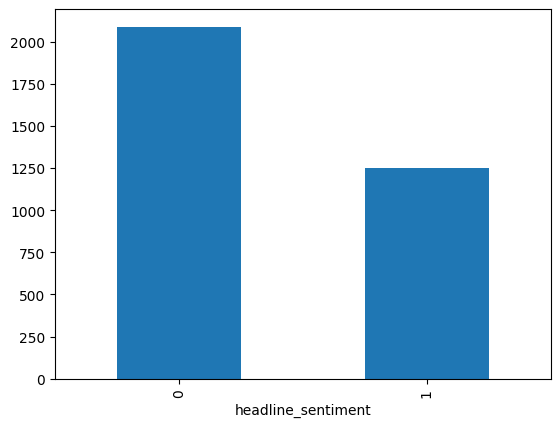

In [12]:
news_df['headline_sentiment'].value_counts().plot(kind='bar')

<Axes: xlabel='desc_sentiment'>

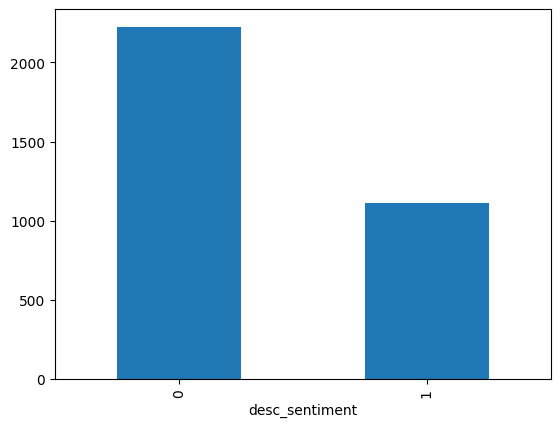

In [13]:
news_df['desc_sentiment'].value_counts().plot(kind='bar')

In [14]:
#Another Method
from textblob import TextBlob
news_df['headline_sentiment_blob'] = news_df['headline'].apply(lambda x:TextBlob(x).sentiment.polarity)
news_df['desc_sentiment_blob'] = news_df['description'].apply(lambda x:TextBlob(x).sentiment.polarity)
news_df.head(10)

,headline,description,date,year,headline_sentiment,desc_sentiment,headline_sentiment_blob,desc_sentiment_blob
0,gaza journalists targets casualties israel war,gaza journalists killed unprecedented rate plu...,23-12-2023,2023,0,0,0.000000,0.175000
1,israel orders death corridor evacuation palest...,hundreds palestinians forced evacuate bureij n...,23-12-2023,2023,0,0,0.000000,-0.300000
2,israel war gaza list key events day 78,un security council passes resolution boost ai...,23-12-2023,2023,0,1,0.000000,0.062500
3,us accuses iran deeply involved houthi attacks...,white house says tehran providing yemeni rebel...,23-12-2023,2023,0,0,0.000000,0.000000
4,israeli forces continue attacks amid criticism...,watereddown resolution boosting aid gaza criti...,23-12-2023,2023,0,0,0.000000,-0.500000
5,rsf files second war crimes complaint icc gaza...,latest complaint parisbased press freedom grou...,22-12-2023,2023,0,1,-0.166667,0.100000
6,un security council passes resolution increase...,us abstains resolution lobbied weaken course s...,22-12-2023,2023,1,0,0.000000,0.000000
7,watching watchdogs west misinterprets middle e...,western media unable assess accurately growing...,22-12-2023,2023,1,0,0.000000,-0.056250
8,marianne williamson us presidential campaign e...,death palestinian child less horrifying death ...,22-12-2023,2023,1,0,0.000000,-0.533333
9,israel aipowered mass assassination factory,accountability transferred software system sof...,22-12-2023,2023,0,0,0.000000,0.000000


<Axes: xlabel='headline_sentiment_blob'>

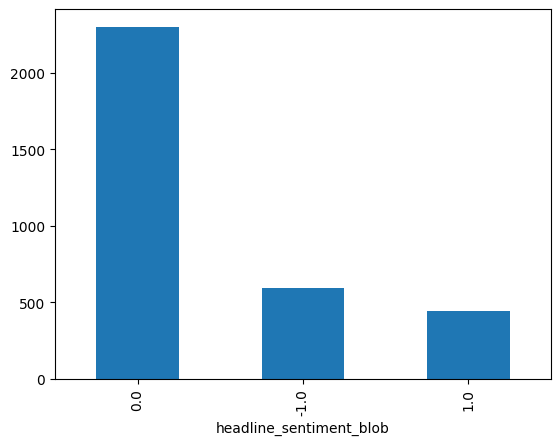

In [15]:
news_df.loc[news_df['headline_sentiment_blob'] < 0, 'headline_sentiment_blob'] = -1
news_df.loc[news_df['headline_sentiment_blob'] > 0, 'headline_sentiment_blob'] = 1
news_df['headline_sentiment_blob'].value_counts().plot(kind='bar') 

<Axes: xlabel='desc_sentiment_blob'>

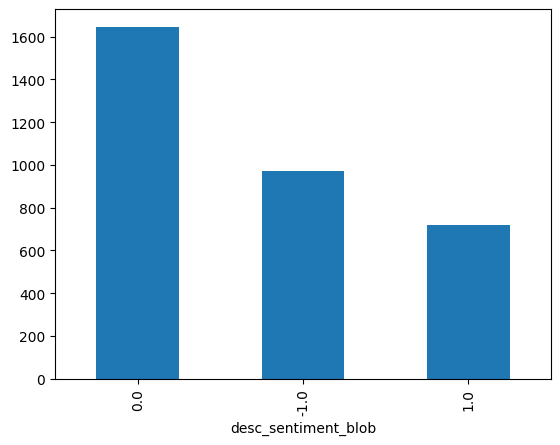

In [16]:
news_df.loc[news_df['desc_sentiment_blob'] < 0, 'desc_sentiment_blob'] = -1
news_df.loc[news_df['desc_sentiment_blob'] > 0, 'desc_sentiment_blob'] = 1
news_df['desc_sentiment_blob'].value_counts().plot(kind='bar')

In [17]:
from transformers import pipeline
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Specify the model and tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Save the model and tokenizer locally
model.save_pretrained('./sentiment_model')
tokenizer.save_pretrained('./sentiment_model')
# Create a sentiment analysis pipeline
nlp = pipeline("sentiment-analysis", model="./sentiment_model", tokenizer="./sentiment_model")


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [18]:

news_df['headline_sentiment_transformer'] = news_df['headline'].apply(lambda x:nlp(x)[0]['score'])
news_df['desc_sentiment_transformer'] = news_df['description'].apply(lambda x:nlp(x)[0]['score'])
news_df.head(10)

,headline,description,date,year,headline_sentiment,desc_sentiment,headline_sentiment_blob,desc_sentiment_blob,headline_sentiment_transformer,desc_sentiment_transformer
0,gaza journalists targets casualties israel war,gaza journalists killed unprecedented rate plu...,23-12-2023,2023,0,0,0.0,1.0,0.608071,0.616410
1,israel orders death corridor evacuation palest...,hundreds palestinians forced evacuate bureij n...,23-12-2023,2023,0,0,0.0,-1.0,0.473634,0.674185
2,israel war gaza list key events day 78,un security council passes resolution boost ai...,23-12-2023,2023,0,1,0.0,1.0,0.266605,0.396796
3,us accuses iran deeply involved houthi attacks...,white house says tehran providing yemeni rebel...,23-12-2023,2023,0,0,0.0,0.0,0.588093,0.272651
4,israeli forces continue attacks amid criticism...,watereddown resolution boosting aid gaza criti...,23-12-2023,2023,0,0,0.0,-1.0,0.431196,0.579130
5,rsf files second war crimes complaint icc gaza...,latest complaint parisbased press freedom grou...,22-12-2023,2023,0,1,-1.0,1.0,0.758816,0.670615
6,un security council passes resolution increase...,us abstains resolution lobbied weaken course s...,22-12-2023,2023,1,0,0.0,0.0,0.264730,0.474640
7,watching watchdogs west misinterprets middle e...,western media unable assess accurately growing...,22-12-2023,2023,1,0,0.0,-1.0,0.231810,0.428259
8,marianne williamson us presidential campaign e...,death palestinian child less horrifying death ...,22-12-2023,2023,1,0,0.0,-1.0,0.225411,0.665488
9,israel aipowered mass assassination factory,accountability transferred software system sof...,22-12-2023,2023,0,0,0.0,0.0,0.348545,0.399248


<Axes: xlabel='headline_sentiment_transformer'>

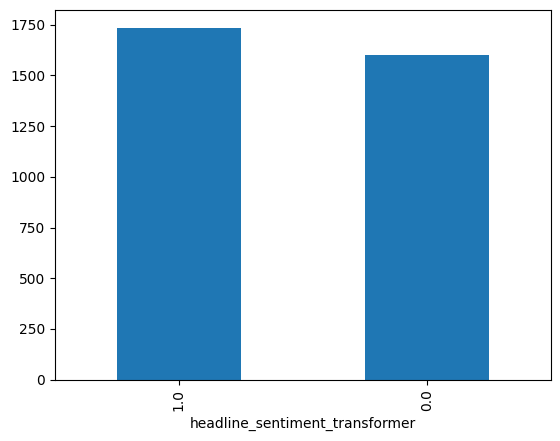

In [19]:
news_df.loc[news_df['headline_sentiment_transformer'] < 0.5, 'headline_sentiment_transformer'] = 0
news_df.loc[news_df['headline_sentiment_transformer'] >= 0.5, 'headline_sentiment_transformer'] = 1
news_df['headline_sentiment_transformer'].value_counts().plot(kind='bar')

<Axes: xlabel='desc_sentiment_transformer'>

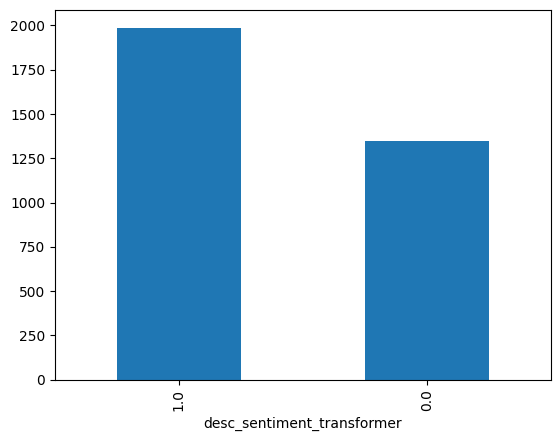

In [20]:
news_df.loc[news_df['desc_sentiment_transformer'] < 0.5, 'desc_sentiment_transformer'] = 0
news_df.loc[news_df['desc_sentiment_transformer'] >= 0.5, 'desc_sentiment_transformer'] = 1
news_df['desc_sentiment_transformer'].value_counts().plot(kind='bar')

# Keywords Extraction

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(news_df["headline"].tolist())
# Get feature names (words) and TF-IDF values
features_names = tfidf_vectorizer.get_feature_names_out()
news_df['headline_keyword'] = news_df['headline'].apply(lambda x:[wrd for wrd in word_tokenize(x) if wrd in features_names])

In [22]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(news_df["description"].tolist())
# Get feature names (words) and TF-IDF values
features_names = tfidf_vectorizer.get_feature_names_out()
news_df['desc_keyword'] = news_df['description'].apply(lambda x:[wrd for wrd in word_tokenize(x) if wrd in features_names])
news_df.head(10)

,headline,description,date,year,headline_sentiment,desc_sentiment,headline_sentiment_blob,desc_sentiment_blob,headline_sentiment_transformer,desc_sentiment_transformer,headline_keyword,desc_keyword
0,gaza journalists targets casualties israel war,gaza journalists killed unprecedented rate plu...,23-12-2023,2023,0,0,0.0,1.0,1.0,1.0,"[gaza, journalists, targets, casualties, israe...","[gaza, journalists, killed, unprecedented, rat..."
1,israel orders death corridor evacuation palest...,hundreds palestinians forced evacuate bureij n...,23-12-2023,2023,0,0,0.0,-1.0,0.0,1.0,"[israel, orders, death, corridor, evacuation, ...","[hundreds, palestinians, forced, evacuate, bur..."
2,israel war gaza list key events day 78,un security council passes resolution boost ai...,23-12-2023,2023,0,1,0.0,1.0,0.0,0.0,"[israel, war, gaza, list, key, events, day, 78]","[un, security, council, passes, resolution, bo..."
3,us accuses iran deeply involved houthi attacks...,white house says tehran providing yemeni rebel...,23-12-2023,2023,0,0,0.0,0.0,1.0,0.0,"[us, accuses, iran, deeply, involved, houthi, ...","[white, house, says, tehran, providing, yemeni..."
4,israeli forces continue attacks amid criticism...,watereddown resolution boosting aid gaza criti...,23-12-2023,2023,0,0,0.0,-1.0,0.0,1.0,"[israeli, forces, continue, attacks, amid, cri...","[watereddown, resolution, boosting, aid, gaza,..."
5,rsf files second war crimes complaint icc gaza...,latest complaint parisbased press freedom grou...,22-12-2023,2023,0,1,-1.0,1.0,1.0,1.0,"[rsf, files, second, war, crimes, complaint, i...","[latest, complaint, parisbased, press, freedom..."
6,un security council passes resolution increase...,us abstains resolution lobbied weaken course s...,22-12-2023,2023,1,0,0.0,0.0,0.0,0.0,"[un, security, council, passes, resolution, in...","[us, abstains, resolution, lobbied, weaken, co..."
7,watching watchdogs west misinterprets middle e...,western media unable assess accurately growing...,22-12-2023,2023,1,0,0.0,-1.0,0.0,0.0,"[watching, watchdogs, west, misinterprets, mid...","[western, media, unable, assess, accurately, g..."
8,marianne williamson us presidential campaign e...,death palestinian child less horrifying death ...,22-12-2023,2023,1,0,0.0,-1.0,0.0,1.0,"[marianne, williamson, us, presidential, campa...","[death, palestinian, child, less, horrifying, ..."
9,israel aipowered mass assassination factory,accountability transferred software system sof...,22-12-2023,2023,0,0,0.0,0.0,0.0,0.0,"[israel, aipowered, mass, assassination, factory]","[accountability, transferred, software, system..."


# Named Entity Extractor

In [23]:
!pip install spacy
!python -m spacy download en_core_web_sm

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [24]:
import spacy
nlp = spacy.load("en_core_web_sm")

def ner(x):
    doc = nlp(x)
    lbl=[]
    for word in doc.ents:
        lbl.append(word.label_)
    return lbl
news_df['head_ner'] = news_df['headline'].apply(lambda x:ner(x))
news_df['desc_ner'] = news_df['description'].apply(lambda x:ner(x))
news_df.head(10)

,headline,description,date,year,headline_sentiment,desc_sentiment,headline_sentiment_blob,desc_sentiment_blob,headline_sentiment_transformer,desc_sentiment_transformer,headline_keyword,desc_keyword,head_ner,desc_ner
0,gaza journalists targets casualties israel war,gaza journalists killed unprecedented rate plu...,23-12-2023,2023,0,0,0.0,1.0,1.0,1.0,"[gaza, journalists, targets, casualties, israe...","[gaza, journalists, killed, unprecedented, rat...","[GPE, GPE]","[GPE, GPE, GPE, NORP]"
1,israel orders death corridor evacuation palest...,hundreds palestinians forced evacuate bureij n...,23-12-2023,2023,0,0,0.0,-1.0,0.0,1.0,"[israel, orders, death, corridor, evacuation, ...","[hundreds, palestinians, forced, evacuate, bur...","[GPE, NORP, GPE]","[CARDINAL, NORP, DATE]"
2,israel war gaza list key events day 78,un security council passes resolution boost ai...,23-12-2023,2023,0,1,0.0,1.0,0.0,0.0,"[israel, war, gaza, list, key, events, day, 78]","[un, security, council, passes, resolution, bo...","[GPE, GPE]","[ORG, GPE]"
3,us accuses iran deeply involved houthi attacks...,white house says tehran providing yemeni rebel...,23-12-2023,2023,0,0,0.0,0.0,1.0,0.0,"[us, accuses, iran, deeply, involved, houthi, ...","[white, house, says, tehran, providing, yemeni...","[GPE, GPE]","[ORG, GPE, NORP]"
4,israeli forces continue attacks amid criticism...,watereddown resolution boosting aid gaza criti...,23-12-2023,2023,0,0,0.0,-1.0,0.0,1.0,"[israeli, forces, continue, attacks, amid, cri...","[watereddown, resolution, boosting, aid, gaza,...","[NORP, GPE]","[PERSON, GPE]"
5,rsf files second war crimes complaint icc gaza...,latest complaint parisbased press freedom grou...,22-12-2023,2023,0,1,-1.0,1.0,1.0,1.0,"[rsf, files, second, war, crimes, complaint, i...","[latest, complaint, parisbased, press, freedom...","[ORDINAL, GPE]",[CARDINAL]
6,un security council passes resolution increase...,us abstains resolution lobbied weaken course s...,22-12-2023,2023,1,0,0.0,0.0,0.0,0.0,"[un, security, council, passes, resolution, in...","[us, abstains, resolution, lobbied, weaken, co...","[ORG, GPE]","[GPE, DATE]"
7,watching watchdogs west misinterprets middle e...,western media unable assess accurately growing...,22-12-2023,2023,1,0,0.0,-1.0,0.0,0.0,"[watching, watchdogs, west, misinterprets, mid...","[western, media, unable, assess, accurately, g...",[PERSON],[LOC]
8,marianne williamson us presidential campaign e...,death palestinian child less horrifying death ...,22-12-2023,2023,1,0,0.0,-1.0,0.0,1.0,"[marianne, williamson, us, presidential, campa...","[death, palestinian, child, less, horrifying, ...","[PERSON, GPE]","[NORP, NORP, ORG]"
9,israel aipowered mass assassination factory,accountability transferred software system sof...,22-12-2023,2023,0,0,0.0,0.0,0.0,0.0,"[israel, aipowered, mass, assassination, factory]","[accountability, transferred, software, system...",[GPE],[PERSON]


# Word Embedding

In [25]:
import gensim 
from gensim.models import Word2Vec 
import nltk
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")

In [26]:
#T-SNE to visualize top  word to vector for each emotion space
def tsne_plot(model):
    labels = list(model.wv.index_to_key)[:30]
    tokens = list(model.wv.vectors)[:30]
    
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=250, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x,y = [], []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    pyplot.scatter(x,y)
    for i in range(len(x)):
        pyplot.annotate(labels[i],xy=(x[i], y[i]))

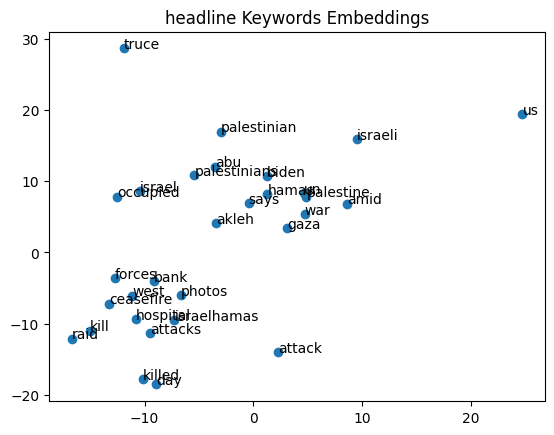

In [27]:
data = news_df["headline"].apply(lambda x: word_tokenize(x))
wrd2vec= gensim.models.Word2Vec(data, min_count = 1,vector_size = 100, window = 5) 
#plot Tsne for word to vector models
tsne_plot(wrd2vec)
pyplot.title("headline Keywords Embeddings")
pyplot.show()

In [28]:
news_df.columns

Index(['headline', 'description', 'date', 'year', 'headline_sentiment',
       'desc_sentiment', 'headline_sentiment_blob', 'desc_sentiment_blob',
       'headline_sentiment_transformer', 'desc_sentiment_transformer',
       'headline_keyword', 'desc_keyword', 'head_ner', 'desc_ner'],
      dtype='object')

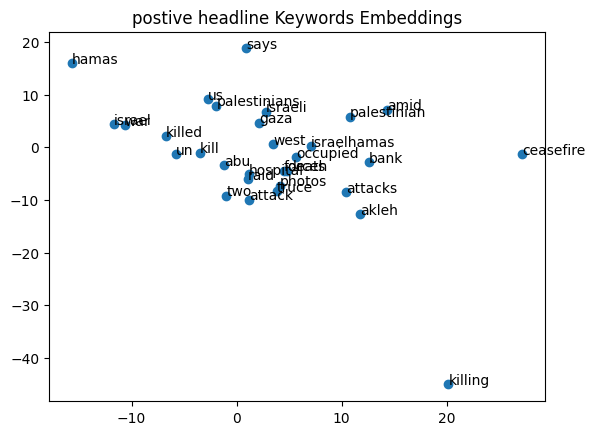

In [29]:
data = news_df[news_df["headline_sentiment_transformer"]==1]["headline"].apply(lambda x: word_tokenize(x))
wrd2vec= gensim.models.Word2Vec(data, min_count = 1,vector_size = 100, window = 5) 
#plot Tsne for word to vector models
tsne_plot(wrd2vec)
pyplot.title("postive headline Keywords Embeddings")
pyplot.show()

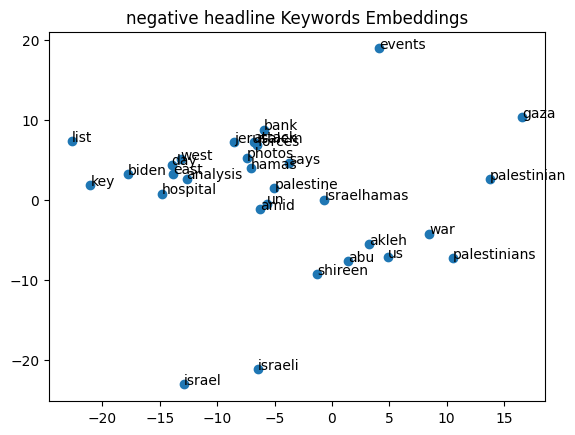

In [30]:
data = news_df[news_df["headline_sentiment_transformer"]==0]["headline"].apply(lambda x: word_tokenize(x))
wrd2vec= gensim.models.Word2Vec(data, min_count = 1,vector_size = 100, window = 5) 
#plot Tsne for word to vector models
tsne_plot(wrd2vec)
pyplot.title("negative headline Keywords Embeddings")
pyplot.show()

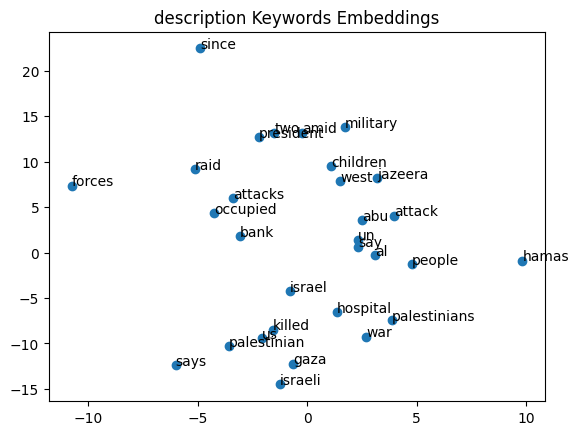

In [31]:
data = news_df["description"].apply(lambda x: word_tokenize(x))
wrd2vec= gensim.models.Word2Vec(data, min_count = 1,vector_size = 100, window = 5) 
#plot Tsne for word to vector models
tsne_plot(wrd2vec)
pyplot.title("description Keywords Embeddings")
pyplot.show()

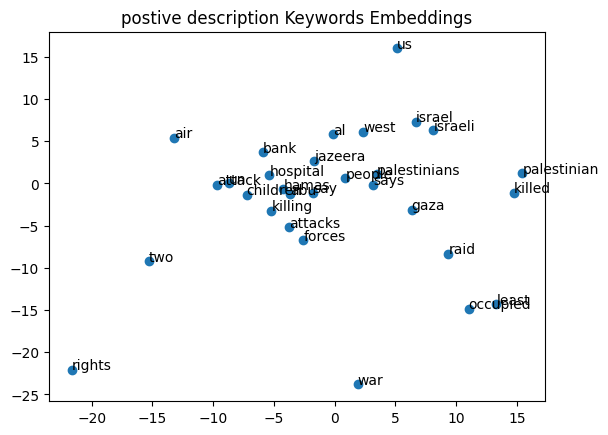

In [32]:
data = news_df[news_df["desc_sentiment_transformer"]==1]["description"].apply(lambda x: word_tokenize(x))
wrd2vec= gensim.models.Word2Vec(data, min_count = 1,vector_size = 100, window = 5) 
#plot Tsne for word to vector models
tsne_plot(wrd2vec)
pyplot.title("postive description Keywords Embeddings")
pyplot.show()

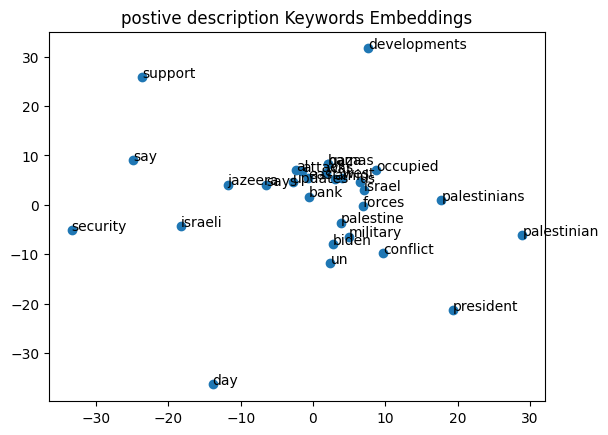

In [33]:
data = news_df[news_df["desc_sentiment_transformer"]==0]["description"].apply(lambda x: word_tokenize(x))
wrd2vec= gensim.models.Word2Vec(data, min_count = 1,vector_size = 100, window = 5) 
#plot Tsne for word to vector models
tsne_plot(wrd2vec)
pyplot.title("postive description Keywords Embeddings")
pyplot.show()